# Adaline

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import Adaline
from mlxtend.plotting import plot_decision_regions

In [3]:
s = (r'C:\Users\USUARIO\Desktop\Personal\Cursos y lectures\Python Machine Learning - Raschka\Datasets\iris.txt')

In [4]:
df = pd.read_csv(s, header = None, encoding = "utf-8")

In [5]:
df.tail(5)

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y=="Iris-setosa", -1, 1)

In [6]:
# Extract sepal lenght and petal lenght
X = df.iloc[0:100, [0,2]].values

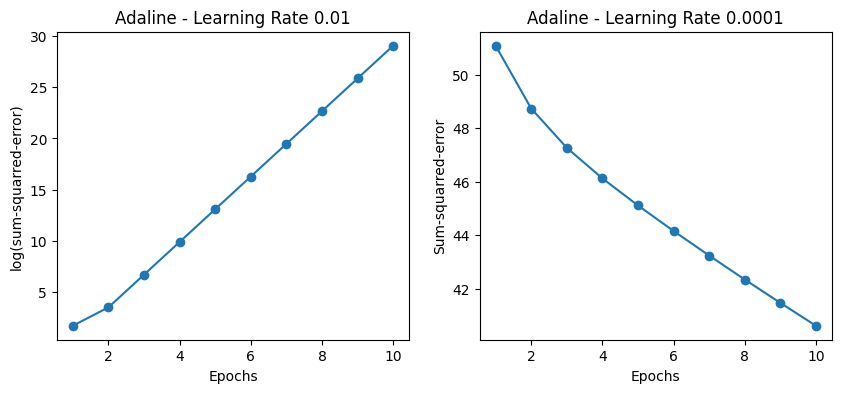

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 = Adaline.AdalineGD(n_iter=10, eta=0.01).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_) + 1),
           np.log10(ada1.cost_), marker="o")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("log(sum-squarred-error)")
ax[0].set_title("Adaline - Learning Rate 0.01")

ada2 = Adaline.AdalineGD(n_iter=10, eta=0.0001).fit(X,y)
ax[1].plot(range(1, len(ada2.cost_) + 1),
           ada2.cost_, marker="o")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Sum-squarred-error")
ax[1].set_title("Adaline - Learning Rate 0.0001")
plt.show()

### Improving gradient decent through feature scaling 

In [8]:
X_std = np.copy(X)

In [9]:
# Se transforman las dos columnas del conjunto de datos (se estandarizan)
X_std[:,0] = (X[:,0]-X[:,0].mean())/(X[:,0].std())
X_std[:,1] = (X[:,1]-X[:,1].mean())/(X[:,1].std())

Después de la estandarizacion, volvemos a entrenar a Adaline y veremos si ahora converge después de un pequeño número de épocas utilizando el mismo learning rate de: \eta=0.01$

In [10]:
ada_gd = Adaline.AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

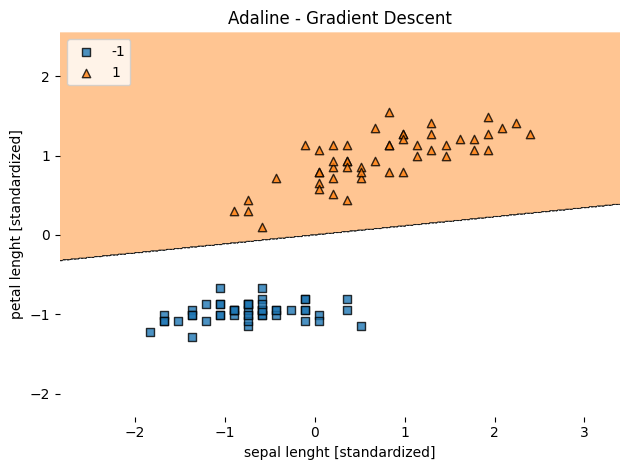

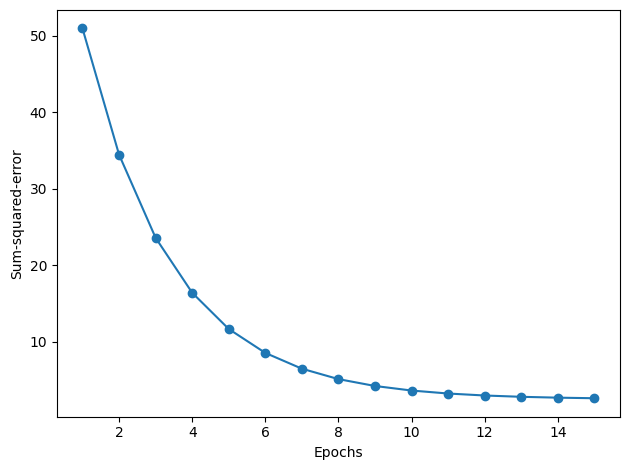

In [11]:
plot_decision_regions(X=X_std, y=y, clf=ada_gd)
plt.title("Adaline - Gradient Descent")
plt.xlabel("sepal lenght [standardized]")
plt.ylabel("petal lenght [standardized]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.cost_)+1),
         ada_gd.cost_, marker="o")
plt.xlabel("Epochs")
plt.ylabel("Sum-squared-error")
plt.tight_layout()
plt.show()